# Project 3

- **Dataset(s) to be used:**
  - EV Charges: https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/all/
  - Population: https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1
  - Income: https://fred.stlouisfed.org/release/tables?eid=259515&rid=249
  - Electricity Price: https://www.electricchoice.com/electricity-prices-by-state/
- **Analysis question:** What factors increase make electric vehicles (EVs) more popular?
- **Columns that will (likely) be used:**
  - state: Two-letter abbreviations of each state
  - state_full: Full name of states
  - chargers_ratio: Number of EV chargers per million people by state
  - income: Median household income by state
  - price: Prices of electricity by state
  - income_price_interaction: Multiplication of income and electricity price by state
- **Columns to be used to merge/join them:**
  - EV Charges: Use the columns of [id], [state], and [country] to create the number of [chargers] by [state].
  - Population: Use the columns of [Population] to caluculate EV [chargers_ratio] per million people by [state].
  - Income: Use the columns of [state_full] and [income] to show the median household income by [state]
  - Electricity Price: Use the columns of [STATE] and electricity price in [Nov 2024] to extract the [price] by [state].
- **Hypothesis**: Higher house hold incomes and lower electricity prices will increase the number of EV chargers. 
- **Site URL:** https://cpt-sipa.readthedocs.io/en/latest/project_3.html

# Table Contents
1. Goal
2. EV Charger
3. Income
4. Electricity Price
5. Comparison
    - EV Chargers vs Income
    - EV Chargers vs Electricity Price
    - EV Chargers vs (Income & Electricity Price)
6. Conclusion

# 1. Goal
This project aims to identify what factor drives the expansion of EVs.
The hypothesis is that higher household incomes and lower electricity prices are associated with the amount of EVs.
To analyze this hypothesis, this porject uses related data in the United States.

An objective variable is the number of EV chargers by state.
Because of the dificulity to obtain the data on the number of EVs by state, it uses the data on EV chargers instead.
It assumes that the number of EV chargers are positively associated with the amount of EVs because EVs requires EV chargers.
Additionally, to compare the expansion of chargers, it uses the chargers ratio which are the numbers of chargers per million people in each state to fairly compare them.

The first explanatory variable is the median household income by state.
Since EVs are expensive and have a short cruising range, the general public might not purchase them for daily use.
Instead, many rich people are said to buy them as their second or third car for their hobby. 
Therefore, more richer people might be associated with more EVs or EV chargers.

The second explanatory variable is the electricity price by state.
As EVs consume much electricity, cheaper electricity might incentivise people to use EVs.
However, Wealthy areas may tend to have a large population, and the cost of electricity may be high.
Therefore, the model may need an interaction term of household incomes and electricity prices.

Base on these discussions, this project creates and evaluate following equation, or model with βs as coefficients.

*EV Chargers Ratio = β0 + β1 × Income + β2 × Electricity Price + β3 × Income × Electricity Price*

# 2. EV Charger

# 2-1. Import Data
- This project uses the data of EV Chargers from [National Renewable Energy Laboratory ](https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/all/).
- Import the data by API and show the first five rows to check the ouput.
- Check the over view of the data.

In [7]:
import requests 
import pandas as pd

In [8]:
# Import the data by API and show the first five rows.
ev_api_url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json"
ev_api_key = "DEMO_KEY"

ev_params = {
    "api_key": ev_api_key,
    "fuel_type_code": "ELEC",
    "status_code": "E",
}

ev_response = requests.get(ev_api_url, params=ev_params)
ev_data = ev_response.json()
ev_df = pd.DataFrame(ev_data['fuel_stations'])

ev_df.head()

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,...,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency,ev_network_ids
0,private,None,None,None,2024-10-11,None,CNG,Private,17,MD,...,None,None,None,None,None,None,Privé,None,NaN,NaN
1,private,None,GOVERNMENT,None,2024-02-12,None,CNG,Private - Government only,45,LD,...,None,None,None,None,None,None,Privé - Réservé au gouvernement,None,NaN,NaN
2,private,None,None,None,2023-12-13,None,CNG,Private,64,HD,...,None,None,None,None,None,None,Privé,None,NaN,NaN
3,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,2024-04-14,None,CNG,Public - Credit card at all times,73,MD,...,None,None,None,None,None,None,Public - Carte de crédit en tout temps,None,NaN,NaN
4,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2024-11-06,None,CNG,Public - Credit card at all times,81,MD,...,None,None,None,None,None,None,Public - Carte de crédit en tout temps,None,NaN,NaN


In [9]:
# Check the information
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91152 entries, 0 to 91151
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   access_code                 91152 non-null  object 
 1   access_days_time            81881 non-null  object 
 2   access_detail_code          7623 non-null   object 
 3   cards_accepted              17805 non-null  object 
 4   date_last_confirmed         90852 non-null  object 
 5   expected_date               5714 non-null   object 
 6   fuel_type_code              91152 non-null  object 
 7   groups_with_access_code     91152 non-null  object 
 8   id                          91152 non-null  int64  
 9   maximum_vehicle_class       21836 non-null  object 
 10  open_date                   90639 non-null  object 
 11  owner_type_code             32669 non-null  object 
 12  restricted_access           22461 non-null  object 
 13  status_code                 911

# 2-2. Clean Data
# 2-2-1. Extract Columns
- Extract only the related columns since there are many columns.

In [11]:
ev_df_filtered = ev_df[['id', 'open_date', 'state', 'country']].copy()
ev_df_filtered.head()

,id,open_date,state,country
0,17,2010-12-01,AL,US
1,45,1996-12-15,GA,US
2,64,1997-01-01,GA,US
3,73,1997-01-01,AR,US
4,81,1996-11-15,MA,US


# 2-2-2. Add Time Data
- Change the type of data related to time from object to date time (datetime64).
- Add year information based on the data of year and month.
- Show the first five rows to check the output.

In [13]:
# Change the type of data related to time from object to date time (datetime64).
ev_df_filtered['open_date'] = pd.to_datetime(
    ev_df_filtered['open_date'],
    format = '%Y-%m-%d',
    errors = 'coerce')

ev_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91152 entries, 0 to 91151
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         91152 non-null  int64         
 1   open_date  90636 non-null  datetime64[ns]
 2   state      91152 non-null  object        
 3   country    91152 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
# Add year information based on the data of year and month.
ev_df_filtered['year'] = ev_df_filtered['open_date'].dt.year
ev_df_filtered['year'] = pd.to_datetime(
    ev_df_filtered['year'],
    format = '%Y',
    errors = 'coerce')

ev_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91152 entries, 0 to 91151
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         91152 non-null  int64         
 1   open_date  90636 non-null  datetime64[ns]
 2   state      91152 non-null  object        
 3   country    91152 non-null  object        
 4   year       90636 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.5+ MB


In [15]:
# Show the first five rows.
ev_df_filtered.head()

,id,open_date,state,country,year
0,17,2010-12-01,AL,US,2010-01-01
1,45,1996-12-15,GA,US,1996-01-01
2,64,1997-01-01,GA,US,1997-01-01
3,73,1997-01-01,AR,US,1997-01-01
4,81,1996-11-15,MA,US,1996-01-01


# 2-2-3. Group Data
- Group the data base on states.
- Count the number of EV chargers.

In [17]:
# Group the data base on states and years.
ev_df_grouped = ev_df_filtered[ev_df_filtered['country'] == 'US'].groupby(
    ['year', 'state']).size().reset_index(name = 'ev_chargers')

ev_df_grouped.sample(5)

,year,state,ev_chargers
1061,2022-01-01,UT,124
993,2021-01-01,NE,105
714,2016-01-01,CA,397
285,2006-01-01,FL,3
534,2012-01-01,MT,1


In [18]:
# Count the number of EV chargers based on state.
ev_df_grouped_state = ev_df_filtered.groupby(
    ['state']).size().reset_index(name = 'ev_chargers').copy()
ev_df_grouped_state.head()

,state,ev_chargers
0,AK,75
1,AL,708
2,AR,551
3,AZ,1703
4,CA,21080


# 2-2-4. Add Full State Names

- Since this data has no full name of each state, add their full names.  

In [21]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

ev_df_grouped_state['state_full'] = ev_df_grouped_state['state'].map(state_mapping)

ev_df_grouped_state.head()

,state,ev_chargers,state_full
0,AK,75,Alaska
1,AL,708,Alabama
2,AR,551,Arkansas
3,AZ,1703,Arizona
4,CA,21080,California


# 2-3. Calculate Chargers Ratio

# 2-3-1. Import Population Data by State

- This project uses the population data from [STATSAMERICA](https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1).
- Import the data by Web Scraping and show the first five rows to check the output.
- Check the over view of the data.

In [25]:
# Import the data by API and show the first five rows.
pop_list = pd.read_html('https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1',
                            match ='Population')
pop_df = pop_list[0]
pop_df.head()

,Rank,State,FIPS Code,Population
0,1,California,6000,38965193
1,2,Texas,48000,30503301
2,3,Florida,12000,22610726
3,4,New York,36000,19571216
4,5,Pennsylvania,42000,12961683


In [26]:
# Check the over view of the data.
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        51 non-null     int64 
 1   State       51 non-null     object
 2   FIPS Code   51 non-null     int64 
 3   Population  51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


# 2-3-2. Merge data

- Merge Population Data on EV Chargers Data.
- Show the first five rows to check the output.

In [29]:
ev = pd.merge(
    left=ev_df_grouped_state,
    right=pop_df[['State', 'Population']], 
    left_on='state_full', 
    right_on='State'
)

ev.head(5)

,state,ev_chargers,state_full,State,Population
0,AK,75,Alaska,Alaska,733406
1,AL,708,Alabama,Alabama,5108468
2,AR,551,Arkansas,Arkansas,3067732
3,AZ,1703,Arizona,Arizona,7431344
4,CA,21080,California,California,38965193


# 2-3-3. Calculate EV Ratio
- EV chargers ratio is the number of EV chargers per 1 million people.
- Show the first five rows to check the output.

In [31]:
ev['chargers_ratio'] = ev['ev_chargers'] / ev['Population'] * 1000000

ev.head()

,state,ev_chargers,state_full,State,Population,chargers_ratio
0,AK,75,Alaska,Alaska,733406,102.262594
1,AL,708,Alabama,Alabama,5108468,138.593410
2,AR,551,Arkansas,Arkansas,3067732,179.611518
3,AZ,1703,Arizona,Arizona,7431344,229.164469
4,CA,21080,California,California,38965193,540.995652


# 2-4. Visualize EV Chargers

- Show the Chargers ratio by state on the map of the United States.
    - There are many EV chargers on the West Coast and in New England.
    - However, south generally has few EV chargers.
- Show the value of each state.
    - Vermont, Massachusetts, and California are the top three states with many EV chargers.
    - By contrast, Louisiana, Mississippi, and Alaska are the worst three states with few EV chargers.
- Show the trend in the number of new EV charger installations.
    - Use the number of new EV chargers as annual population data over time are not available.
    - The number has been increasing since around 2019, peaked in 2021, and has shown a slight decline recently.

In [34]:
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [35]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


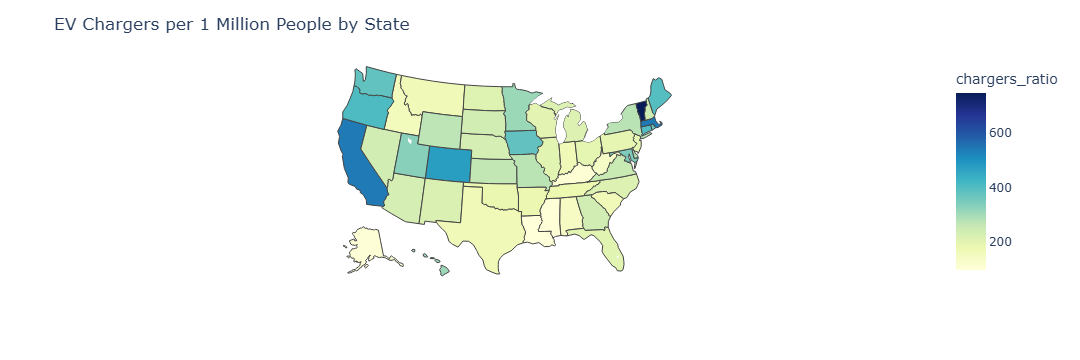

In [36]:
fig = px.choropleth(
    ev,
    locations='state',
    locationmode='USA-states',
    color='chargers_ratio',
    hover_name='state_full',
    color_continuous_scale='YlGnBu',
    scope='usa',
    labels={'ev_chargers': 'EV Chargers per 1 Million People'}
)

fig.update_layout(
    title_text='EV Chargers per 1 Million People by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.update_layout(width=700)
fig.show()

fig.write_html('chargers_ratio_by_state.html')

[EV Chargers Over Time](chargers_ratio_by_state.html)


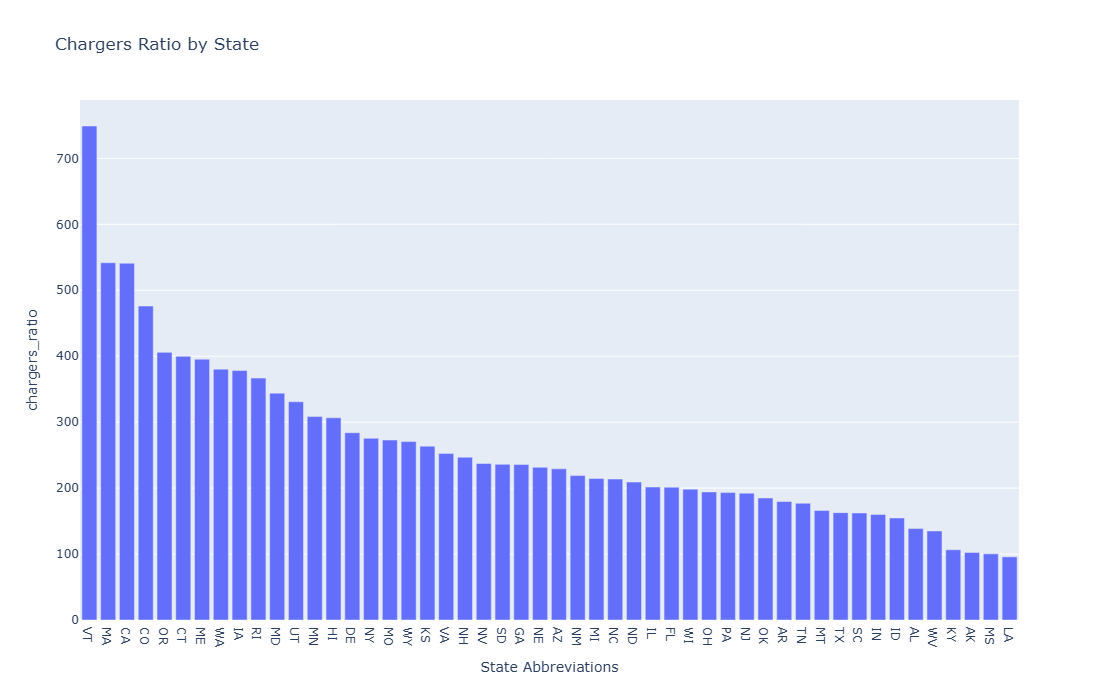

In [38]:
# Show the value of each state.
ev_sort = ev.sort_values('chargers_ratio' , ascending = False)
fig = px.bar(
    ev_sort,
    x = 'state',
    y = 'chargers_ratio',
    title = 'Chargers Ratio by State',
    labels={'state': 'State Abbreviations', 'ev_chargers': 'EV Chargers per 1 Million People'}
)

fig.update_layout(width=700, height=700)
fig.show()

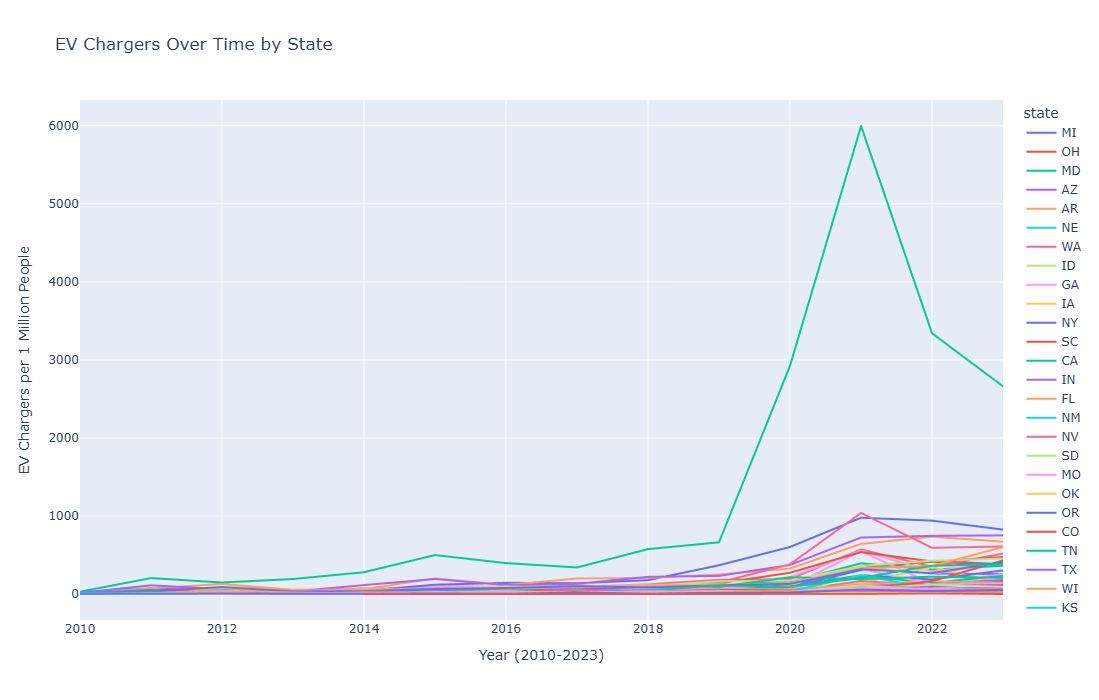

In [39]:
# Show the trend in the number of new EV charger installations.
fig = px.line(
    ev_df_grouped,
    x = 'year',
    y = 'ev_chargers',
    color = 'state',
    title = 'EV Chargers Over Time by State',
    labels={'year': 'Year (2010-2023)', 'ev_chargers': 'EV Chargers per 1 Million People'}
)

fig.update_xaxes(range=['2010-01-01', '2023-01-01'])
fig.update_layout(width=700, height=700)
fig.show()

# 3. Income

# 3-1. Import Data
- Use the data of the median household income from [Federal Reserve Economic Data](https://fred.stlouisfed.org/release/tables?eid=259515&rid=249).
- Import the data by Web Scraping and show the first five rows.
- Check the overview of the data.

In [42]:
# Import the data by Web Scraping and show the first five rows.
income_list = pd.read_html('https://fred.stlouisfed.org/release/tables?eid=259515&rid=249',
                            match ='2023')
income_df = income_list[0]
income_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 2023 C-CPI-U Dollars  \
  Unnamed: 0_level_1               Name                 2023   
0                NaN  The United States                80610   
1                NaN            Alabama                60660   
2                NaN             Alaska                98190   
3                NaN            Arizona                82660   
4                NaN           Arkansas                63250   

                                           
  Preceding  Period Year Ago  from Period  
0             77540                 77540  
1             62290                 62290  
2             93310                 93310  
3             76370                 76370  
4             56120                 56120

In [43]:
# Check the over view of the data.
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1)       0 non-null      float64
 1   (Unnamed: 1_level_0, Name)                     52 non-null     object 
 2   (2023 C-CPI-U Dollars, 2023)                   52 non-null     int64  
 3   (2023 C-CPI-U Dollars, Preceding  Period)      52 non-null     int64  
 4   (2023 C-CPI-U Dollars, Year Ago  from Period)  52 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


# 3-2. Clean Data 

# 3-2-1. Pick up and Rename Columns

- Pick up only necessary coulmn's as there are unnecessary ones.
- Clean each clumn's name since the downloaded data has unnecessary headers.
- Show the first five rows to check the output.

In [47]:
income_interim = income_df.drop(income_df.columns[[0, 3, 4]], axis=1)
income_interim.columns = income_interim.iloc[0]
income_interim = income_interim.rename(columns={'The United States': 'state_full', 80610: 'income' })
income = income_interim.drop(index=0).copy()
income.head()

,state_full,income
1,Alabama,60660
2,Alaska,98190
3,Arizona,82660
4,Arkansas,63250
5,California,89870


# 3-2-2. Add State Abbreviations

- Add state abbreviations since this data does not have them.

In [50]:
state_mapping2 = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


income['state'] = income['state_full'].map(state_mapping2)

income.head()

,state_full,income,state
1,Alabama,60660,AL
2,Alaska,98190,AK
3,Arizona,82660,AZ
4,Arkansas,63250,AR
5,California,89870,CA


# 3-3. Visualize Median Household Income

- Show the median household incomes by state on the map of the United States.
    - The incomes in the West Coast and in New England is higher than other areas.
    - However, south east generally has fewer incomes than other areas.
- Show the value of each state.
    - Massachusetts, Maryland, Utach are the top three states with many EV chargers.
    - By contrast, Mississippi, Louisiana, and West Virginia are the worst three states with few EV chargers.

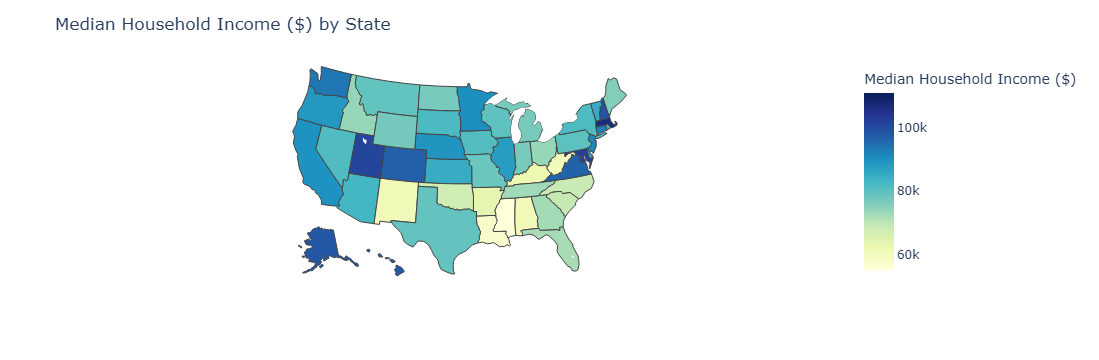

In [83]:
fig = px.choropleth(
    income,
    locations='state',
    locationmode='USA-states',
    color='income',
    hover_name='state_full',
    color_continuous_scale='YlGnBu',
    scope='usa',
    labels={'income': 'Median Household Income ($)'}
)

fig.update_layout(
    title_text='Median Household Income ($) by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.update_layout(width=700)
fig.show()

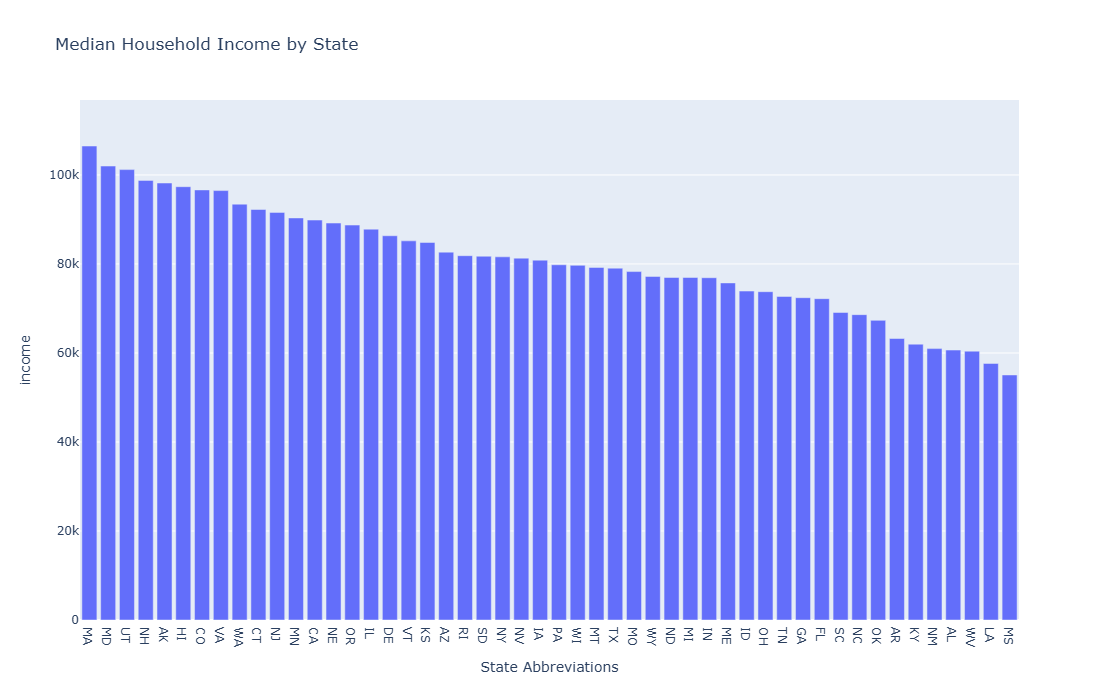

In [85]:
# Show the value of each state.
income_sort = income.sort_values('income' , ascending = False)
fig = px.bar(
    income_sort,
    x = 'state',
    y = 'income',
    title = 'Median Household Income by State',
    labels={'Income': 'Median Household Income ($)', 'state': 'State Abbreviations'}
)

fig.update_layout(width=700, height=700)
fig.show()

# 4. Electricity Price

# 4-1. Import Data

- Use the data of the electricity price from [Electric Choice](https://www.electricchoice.com/electricity-prices-by-state/).
- Import the data by Web Scraping and show the first five rows.
- Check the over view of the data.

In [87]:
# Import the data by web scraping and show the first five rows.
url = 'https://www.electricchoice.com/electricity-prices-by-state/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url, headers=headers)
dfs = pd.read_html(response.content, match='Dec 2024')

electricity_df = dfs[0]
electricity_df.head()

,STATE,Dec 2024,Dec 2023,MOVEMENT,CHANGE (%)
0,Alabama,12.41Â¢ / kWh,12.79Â¢ / kWh,DOWN,-2.971 %
1,Alaska,22.54Â¢ / kWh,22.14Â¢ / kWh,UP,1.806 %
2,Arizona,13.16Â¢ / kWh,12.65Â¢ / kWh,UP,4.031 %
3,Arkansas,9.99Â¢ / kWh,10.73Â¢ / kWh,DOWN,-6.896 %
4,California,19.90Â¢ / kWh,19.39Â¢ / kWh,UP,2.630 %


In [89]:
# Check the over view of the data.
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATE       51 non-null     object
 1   Dec 2024    51 non-null     object
 2   Dec 2023    51 non-null     object
 3   MOVEMENT    51 non-null     object
 4   CHANGE (%)  51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


# 4-2. Clean Data

# 4-2-1. Extract Price Number

- Extract price numbers from the column of prices in Dec 2024 since prices of this data include letters.

In [91]:
def extract_price(value):
    number_str = ""
    for char in value:
        if char.isdigit() or char == '.':
            number_str += char
    return float(number_str)


electricity_df['PRICE'] = electricity_df['Dec 2024'].apply(extract_price)

electricity_df.head(5)

,STATE,Dec 2024,Dec 2023,MOVEMENT,CHANGE (%),PRICE
0,Alabama,12.41Â¢ / kWh,12.79Â¢ / kWh,DOWN,-2.971 %,12.41
1,Alaska,22.54Â¢ / kWh,22.14Â¢ / kWh,UP,1.806 %,22.54
2,Arizona,13.16Â¢ / kWh,12.65Â¢ / kWh,UP,4.031 %,13.16
3,Arkansas,9.99Â¢ / kWh,10.73Â¢ / kWh,DOWN,-6.896 %,9.99
4,California,19.90Â¢ / kWh,19.39Â¢ / kWh,UP,2.630 %,19.90


# 4-2-2. Add State Abbreviations

- Add the state abbreviations since this data does not have them.
- Show the first five rows to check the output.

In [93]:
electricity_df['state'] = electricity_df['STATE'].map(state_mapping2)
electricity_df.head()

,STATE,Dec 2024,Dec 2023,MOVEMENT,CHANGE (%),PRICE,state
0,Alabama,12.41Â¢ / kWh,12.79Â¢ / kWh,DOWN,-2.971 %,12.41,AL
1,Alaska,22.54Â¢ / kWh,22.14Â¢ / kWh,UP,1.806 %,22.54,AK
2,Arizona,13.16Â¢ / kWh,12.65Â¢ / kWh,UP,4.031 %,13.16,AZ
3,Arkansas,9.99Â¢ / kWh,10.73Â¢ / kWh,DOWN,-6.896 %,9.99,AR
4,California,19.90Â¢ / kWh,19.39Â¢ / kWh,UP,2.630 %,19.90,CA


# 4-2-3. Pick Up Necessary Columns

- Choose only necessary columns.
- Show the first five rows to check the output.

In [95]:
electricity = electricity_df[['state', 'STATE', 'PRICE']].copy()
electricity.head()

,state,STATE,PRICE
0,AL,Alabama,12.41
1,AK,Alaska,22.54
2,AZ,Arizona,13.16
3,AR,Arkansas,9.99
4,CA,California,19.90


# 4-3. Visualize Electricity Prices.

- Show the electricity prices by state on the map of the United States.
    - The prices in California, Land far from the mainland, such as Hawaii and Alaska, and in New England is higher than other areas.
    - There are no extreme differences in other regions.
- Show the value of each state.
    - Hawaii,　Alaska, Connecticut are the top three states with hige prices.
    - By contrast, Louisiana, Washington, and Arkansas are the worst three states with low prices..37


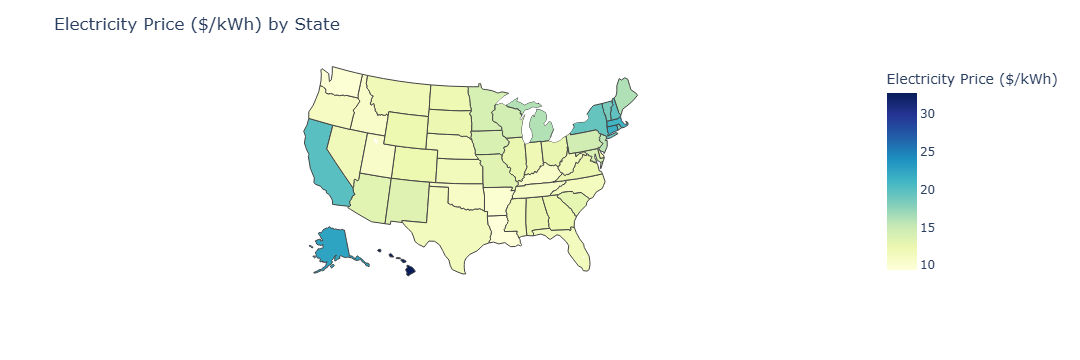

In [97]:
fig = px.choropleth(
    electricity,
    locations='state',
    locationmode='USA-states',
    color='PRICE',
    hover_name='STATE',
    color_continuous_scale='YlGnBu',
    scope='usa',
    labels={'PRICE': 'Electricity Price ($/kWh)'}
)

fig.update_layout(
    title_text='Electricity Price ($/kWh) by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.update_layout(width=700)
fig.show()

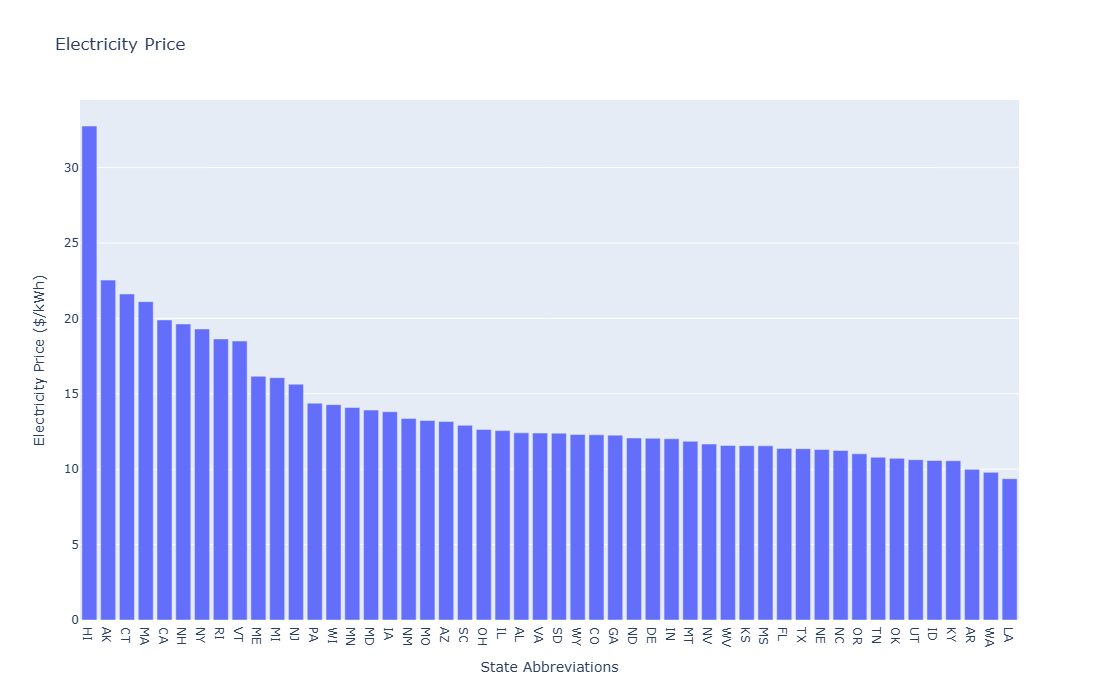

In [99]:
# Show the value of each state.
electricity_sort = electricity.sort_values('PRICE' , ascending = False)
fig = px.bar(
    electricity_sort,
    x = 'state',
    y = 'PRICE',
    title = 'Electricity Price',
    labels={'PRICE': 'Electricity Price ($/kWh)', 'state': 'State Abbreviations'}
)

fig.update_layout(width=700, height=700)
fig.show()

# 5. Comparison

# 5-1. EV Charger Ratio vs Income

- Marge the data of the EV charger ratio and the income.
- Compare them by showing the scatter plot.
- Show the OLS regression result.
- The result implies that the median household income is positively associated with the EV charger.
    - The R-suared (0.309) is quite good.
    - The coefficient (0.0057) is positive.
    - The p-value (0.000) is statistically significant at the 5% level.
- This result aligns with the hypothesis of positive correlation between the EV charger ratio and the income.

In [101]:
# Marge data of the EV charger ratio and the income.
ev_income = pd.merge(
    left = ev[['state', 'state_full', 'chargers_ratio']], 
    right = income[['state', 'income']], 
    on='state',
    )

ev_income.head()

,state,state_full,chargers_ratio,income
0,AK,Alaska,102.262594,98190
1,AL,Alabama,138.593410,60660
2,AR,Arkansas,179.611518,63250
3,AZ,Arizona,229.164469,82660
4,CA,California,540.995652,89870


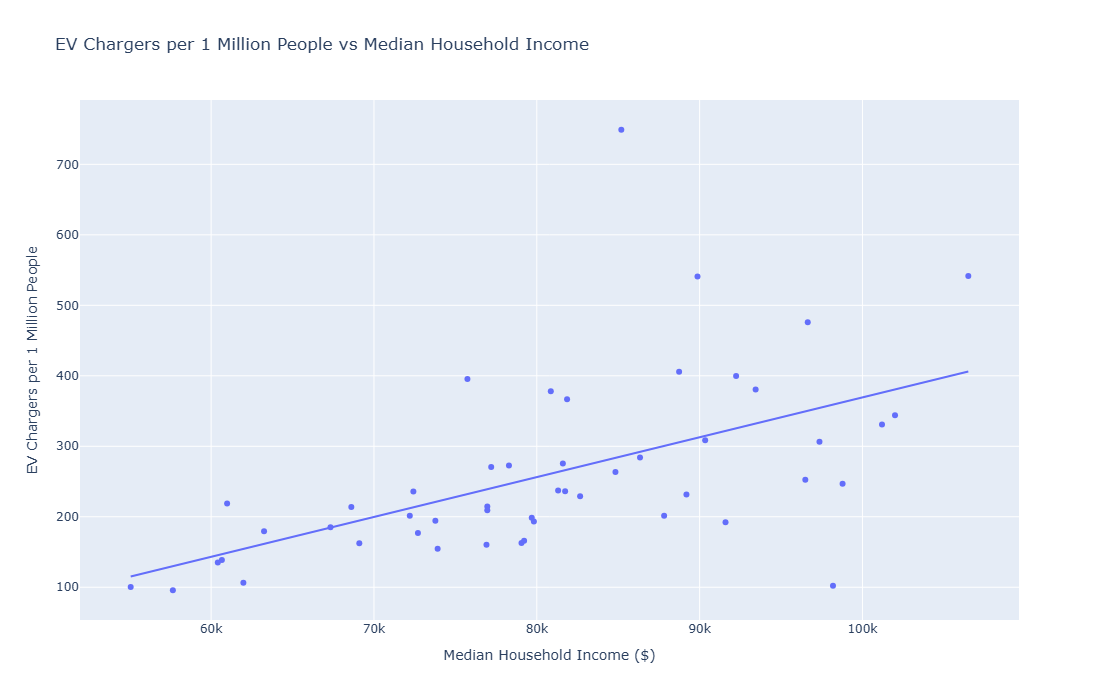

In [103]:
# Compare the data of the EV charger ratio and the income by showing the scatter plot.
fig = px.scatter(
    ev_income,
    x='income',
    y='chargers_ratio',
    title='EV Chargers per 1 Million People vs Median Household Income',
    trendline='ols',
    labels={'income': 'Median Household Income ($)', 'chargers_ratio': 'EV Chargers per 1 Million People'}
)

fig.update_layout(width=700, height=700)
fig.show()

In [105]:
# Show the OLS regression result.
trend_results = px.get_trendline_results(fig).iloc[0, 0]
trend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     21.51
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.73e-05
Time:                        22:22:01   Log-Likelihood:                -303.58
No. Observations:                  50   AIC:                             611.2
Df Residuals:                      48   BIC:                             615.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -196.0756     99.599     -1.969      0.055    -396.333       4.182
x1             0.0057      0.001      4.638      0.000       0.003       0.008
==============================================================================
Omnibus:                       33.336   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.493
Skew:                           1.711   Prob(JB):                     1.24e-23
Kurtosis:                       9.240   Cond. No.                     5.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5-2. EV Charger Ratio vs Electricity Price

- Marge the data of the EV charger ratio and the Electricity Price.
- Compare them by showing the scatter plot.
- Show the OLS regression result.
- The result implies that the electricity price is positively associated with the EV charger.
  - The R-suared (0.149) is low.
  - The coefficient (11.5367) is positive.
  - The p-value (0.006) is statistically significant at the 5% level.
- This result contradicts the hypothesis of negative correlation between the EV charger ratio and the Electricity Price.

In [107]:
# Marge data of the EV charger ratio and the electricity price.
ev_electricity = pd.merge(
     left = ev[['state', 'state_full', 'chargers_ratio']], 
     right = electricity[['state', 'PRICE']],
     on = 'state'
     )

ev_electricity.head()

,state,state_full,chargers_ratio,PRICE
0,AK,Alaska,102.262594,22.54
1,AL,Alabama,138.593410,12.41
2,AR,Arkansas,179.611518,9.99
3,AZ,Arizona,229.164469,13.16
4,CA,California,540.995652,19.90


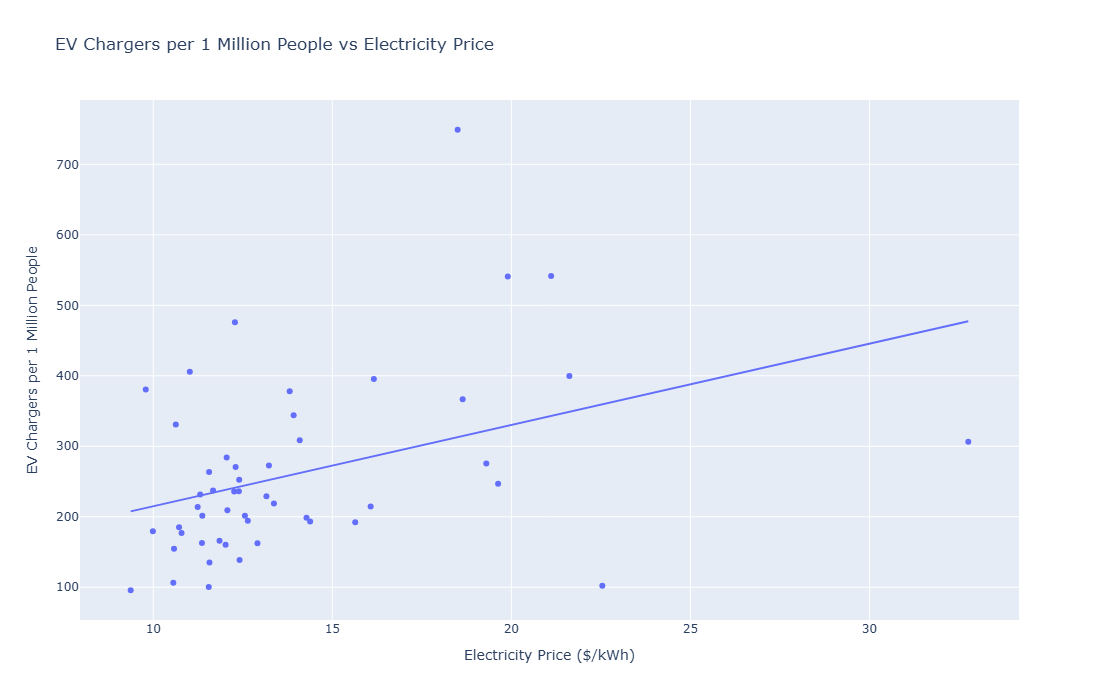

In [109]:
# Compare the data of the EV charger ratio and electricity price by showing the scatter plot.
fig = px.scatter(
    ev_electricity,
    x = 'PRICE',
    y = 'chargers_ratio',
    title = 'EV Chargers per 1 Million People vs Electricity Price',
    trendline = 'ols',
    labels={'PRICE': 'Electricity Price ($/kWh)', 'chargers_ratio': 'EV Chargers per 1 Million People'}
)

fig.update_layout(width = 700, height = 700)
fig.show()

In [111]:
# Show the OLS regression result.
trend_results = px.get_trendline_results(fig).iloc[0, 0]
trend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     8.424
Date:                Fri, 06 Dec 2024   Prob (F-statistic):            0.00558
Time:                        22:22:08   Log-Likelihood:                -308.79
No. Observations:                  50   AIC:                             621.6
Df Residuals:                      48   BIC:                             625.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5796     57.924      1.719      0.092     -16.885     216.044
x1            11.5367      3.975      2.902      0.006       3.545      19.529
==============================================================================
Omnibus:                       18.273   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.400
Skew:                           1.203   Prob(JB):                     1.85e-06
Kurtosis:                       5.623   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5-3. EV Charger Ratio vs (Income & Electricity Price)

# 5-3-1. Merge Data

- Marge the data of the EV charger ratio, the income, and the electricity price.

In [113]:
ev_income_electricity = pd.merge(
    left = ev_income,
    right = electricity[['state', 'PRICE']],
    on = 'state',
)

ev_income_electricity.head()

,state,state_full,chargers_ratio,income,PRICE
0,AK,Alaska,102.262594,98190,22.54
1,AL,Alabama,138.593410,60660,12.41
2,AR,Arkansas,179.611518,63250,9.99
3,AZ,Arizona,229.164469,82660,13.16
4,CA,California,540.995652,89870,19.90


# 5-3-2. Visualization

- Compare them by showing the scatter plot using a bubble chart.
- The reults implies that the higer income and the higher electricity price are associated with higher EV charger ratio.

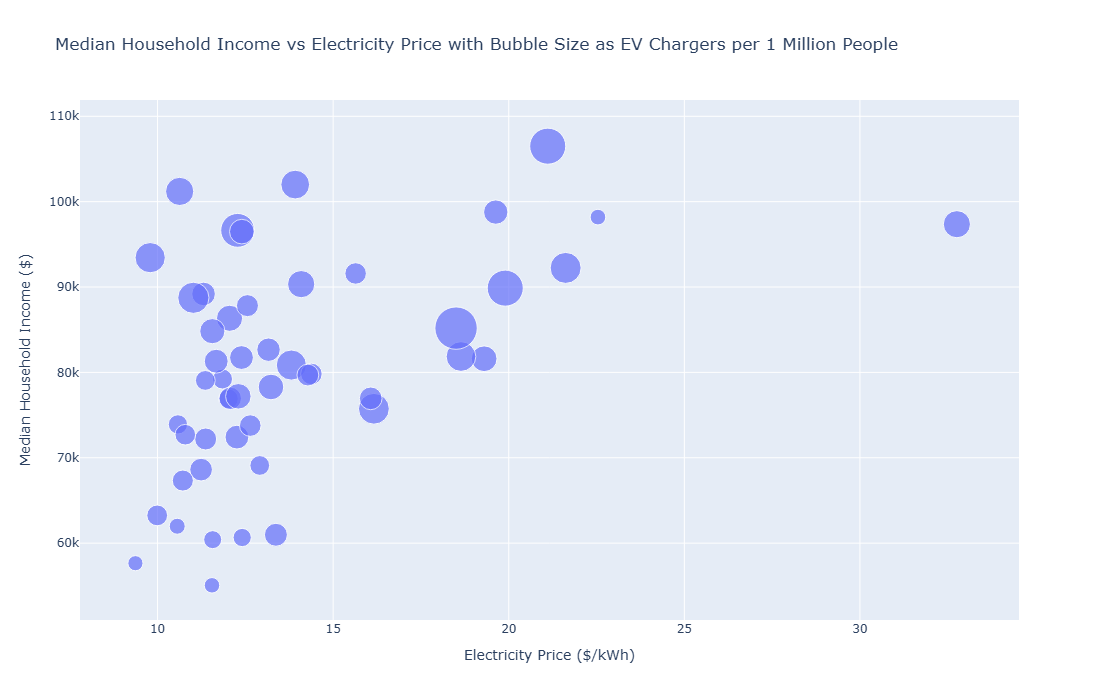

In [115]:
fig = px.scatter(
    ev_income_electricity,
    x='PRICE',
    y='income',
    size='chargers_ratio',
    size_max=30,
    hover_name='state_full',
    hover_data={'chargers_ratio': True, 'income': True, 'PRICE': True},
    title='Median Household Income vs Electricity Price with Bubble Size as EV Chargers per 1 Million People',
    labels={'PRICE': 'Electricity Price ($/kWh)', 'income': 'Median Household Income ($)'}
)

fig.update_layout(width = 700, height = 700)
fig.show()

# 5-3-3. OLS Regression

- Show the OLS regression result.
- Tthe number of chargers per 1 million people is associated with higher incomes, higher electricity prices and lower interactions of them.
  - The R-suared (0.395) is relatively high and better than previous models.
  - The coefficient of the income (0.0152) is positive.
  - The coefficient of the electricity price (83.0387) is positive.
  - The coefficient of the interaction term (-0.0008) is negative.
  - The p-value of the income (0.002) is statistically significant at the 5% level.
  - The p-value of the electricity price (0.021) is statistically significant at the 5% level.
  - The p-value of the interaction term (0.028) is statistically significant at the 5% level.

In [117]:
import statsmodels.api as sm

ev_income_electricity['income_PRICE_interaction'] = ev_income_electricity['income'] * ev_income_electricity['PRICE']

X = ev_income_electricity[['income', 'PRICE', 'income_PRICE_interaction']]
y = ev_income_electricity['chargers_ratio']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

coefficients = model.params
const_coef = coefficients['const']
income_coef = coefficients['income']
price_coef = coefficients['PRICE']
interaction_coef = coefficients['income_PRICE_interaction']

                            OLS Regression Results                            
Dep. Variable:         chargers_ratio   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     10.01
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           3.40e-05
Time:                        22:22:14   Log-Likelihood:                -300.27
No. Observations:                  50   AIC:                             608.5
Df Residuals:                      46   BIC:                             616.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# 5-3-4. Prediction Accuracy

- Define the function of the model.
  - *Model: EV Chargers Ratio = -1153.4187 + 0.0152 × Income + 82.9876 × Electricity Price - 0.0008 × Income × Electricity Price*
- Show the chargers ratio and prediction by the model.
- For the graph, the prediction has quite good accuracy.

In [119]:
# Define the function of the model.
def model(x1, x2):
    y = const_coef + income_coef*x1 + price_coef*x2 + interaction_coef*x1*x2
    return y

In [121]:
# Calculate the predictions.
import numpy as np
ev_income_electricity['prediction'] = ev_income_electricity.apply(
    lambda row: model(row['income'], row['PRICE']),
    axis=1
)

ev_income_electricity.head()

,state,state_full,chargers_ratio,income,PRICE,income_PRICE_interaction,prediction
0,AK,Alaska,102.262594,98190,22.54,2213202.6,346.445805
1,AL,Alabama,138.593410,60660,12.41,752790.6,163.430759
2,AR,Arkansas,179.611518,63250,9.99,631867.5,103.384031
3,AZ,Arizona,229.164469,82660,13.16,1087805.6,277.818981
4,CA,California,540.995652,89870,19.90,1788413.0,358.042995


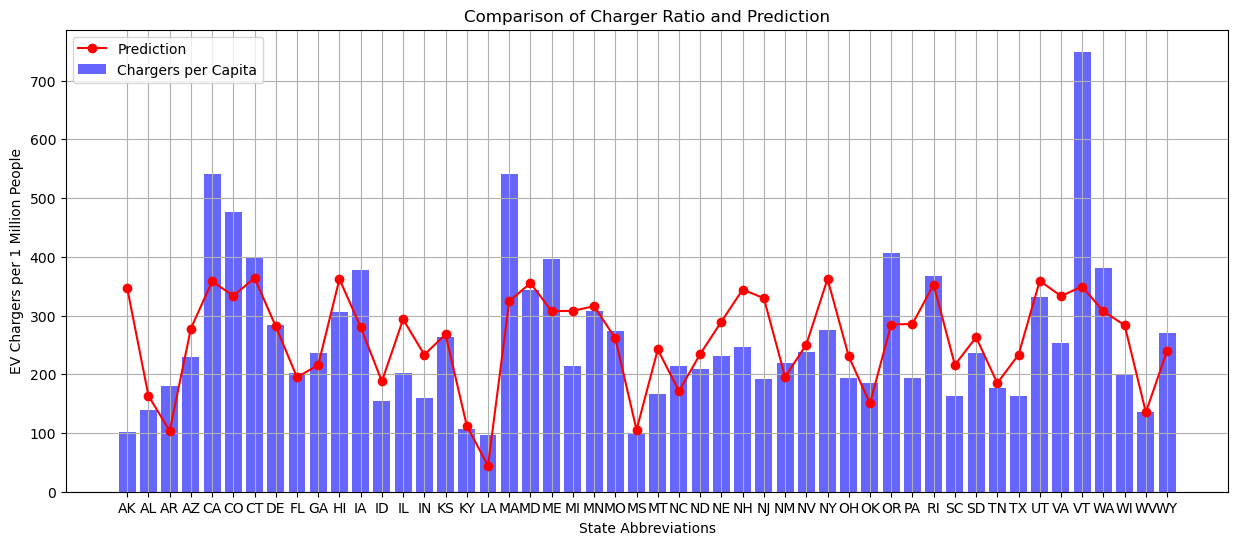

In [123]:
# Show the chargers ratio and prediction by the model.
plt.figure(figsize=(15, 6))

plt.bar(ev_income_electricity['state'], 
        ev_income_electricity['chargers_ratio'], 
        color='blue',
        alpha=0.6,
        label='Chargers per Capita')

plt.plot(ev_income_electricity['state'], 
         ev_income_electricity['prediction'],
         color='red',
         marker='o',
         label='Prediction')

plt.xlabel('State Abbreviations')
plt.ylabel('EV Chargers per 1 Million People')
plt.title('Comparison of Charger Ratio and Prediction')
plt.legend()
plt.grid(True)

plt.show()

# 5-3-5. Sensitivity Analysis

- Investigate how much the EV chargers ratio changes when each explanatory variable changes by 1%.
- 1% increase in income is associated with additional 2.78  chargers per 1 million people.
- 1% increase in electricity price is associated with additional 2.12 chargers per 1 million people.

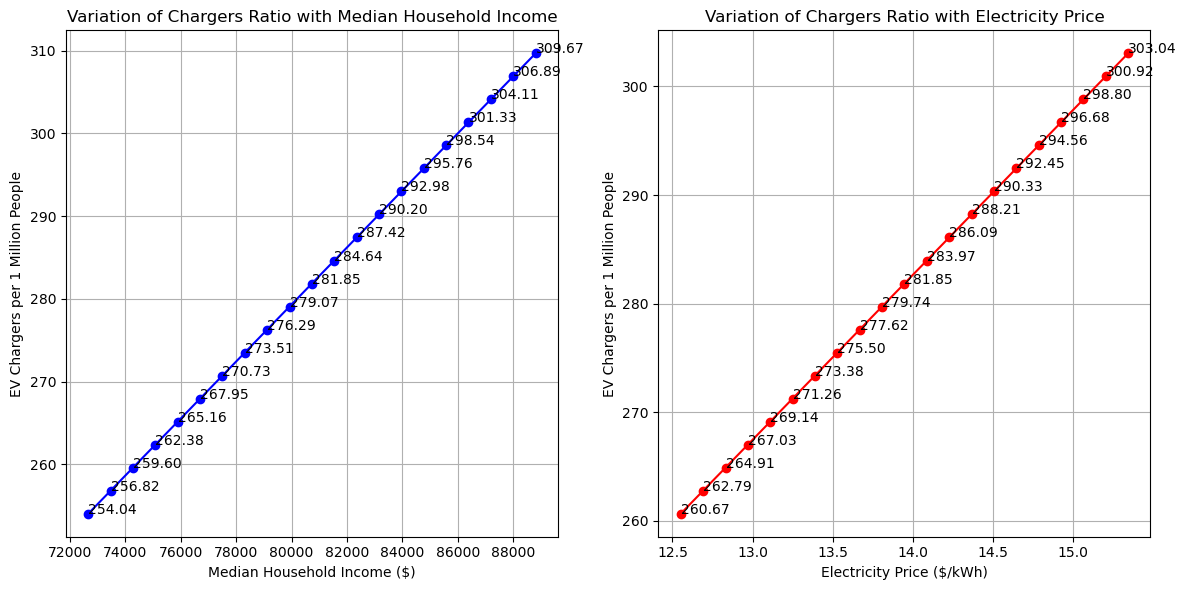

In [125]:
x1_base = ev_income_electricity['income'].mean()
x2_base = ev_income_electricity['PRICE'].mean()
x1_values = np.linspace(x1_base * 0.9, x1_base * 1.1, 21) 
x2_values = np.linspace(x2_base * 0.9, x2_base * 1.1, 21) 

plt.figure(figsize=(12, 6))

y_values_x1 = model(x1_values, x2_base)
plt.subplot(1, 2, 1)
plt.plot(x1_values, y_values_x1, marker='o', linestyle='-', color='blue')
for i, txt in enumerate(y_values_x1):
    plt.annotate(f'{txt:.2f}', (x1_values[i], y_values_x1[i]))
plt.title('Variation of Chargers Ratio with Median Household Income')
plt.xlabel('Median Household Income ($)')
plt.ylabel('EV Chargers per 1 Million People')
plt.grid(True)

y_values_x2 = model(x1_base, x2_values)
plt.subplot(1, 2, 2)
plt.plot(x2_values, y_values_x2, marker='o', linestyle='-', color='red')
for i, txt in enumerate(y_values_x2):
    plt.annotate(f'{txt:.2f}', (x2_values[i], y_values_x2[i]))
plt.title('Variation of Chargers Ratio with Electricity Price')
plt.xlabel('Electricity Price ($/kWh)')
plt.ylabel('EV Chargers per 1 Million People')
plt.grid(True)

plt.tight_layout()
plt.show()

In [127]:
change_by_income = model(x1_base*1.01, x2_base) - model(x1_base, x2_base)
change_by_price = model(x1_base, x2_base*1.01) - model(x1_base, x2_base)
print(f'1% increase in income is associated with additional {change_by_income:.2f} chargers per 1 million people.')
print(f'1% increase in electricity price is associated with additional {change_by_price:.2f} chargers per 1 million people.')

1% increase in income is associated with additional 2.78 chargers per 1 million people.
1% increase in electricity price is associated with additional 2.12 chargers per 1 million people.


In [129]:
increase_rate = 1.01

change_by_income = model(x1_base * increase_rate, x2_base) - model(x1_base, x2_base)
change_by_price = model(x1_base, x2_base * increase_rate) - model(x1_base, x2_base)

print(f'{(increase_rate-1)*100:.0f}% increase in income is associated with additional {change_by_income:.2f} EV chargers per 1 million people.')
print(f'{(increase_rate-1)*100:.0f}% increase in electricity price is associated with additional {change_by_price:.2f} EV chargers per 1 million people.')


1% increase in income is associated with additional 2.78 EV chargers per 1 million people.
1% increase in electricity price is associated with additional 2.12 EV chargers per 1 million people.


# 5-3-6. Hypothesis Verification

- Identify the conditions where the hypothesis that incomes have positive and electric prices have negative impacts on the number of EV chargers is true.
- Chage the original model (Model 0) to the Model 1 using income as a variable and the Model 2 using electric price as a variable.
    - *Model 0: EV Chargers Ratio = -1153.4187 + 0.0152 × Income + 82.9876 × Electricity Price - 0.0008 × Income × Electricity Price*
    - *Model 1: EV Chargers Ratio = -(1153.4187 - 82.9876 × Electricity Price) + (0.0152 - 0.0008 × Electricity Price) × Income*
    - *Model 2: EV Chargers Ratio = -(1153.4187 - 0.0152 × Income) + (82.9876 - 0.0008 × Income) × Electricity Price*
- The coefficient of income is positive when (0.0152 - 0.0008 × Electricity Price) is larger than zero, meaning that the electricity prices are less than 19.0/kWh dollars.
- The coefficient of electric price is negative when (82.9876 - 0.0008 × Income) is less than zero, meaning that the incomes are larger than 98.8K dollars.
- While the states with electricity prices less than 19.0/kWh dollars are 41, the state with an income larger than 103.7345K dollars is three.
- Only two states with electricity prices less than 19.0/kWh dollars and with an income larger than 98.8K dollars.
- Hypothesis verification:
    - This implies that the hypothesis hold true in only two states of Marylandand and Utah.
    - In the 41 states with electricity prices less than 19.0/kWh dollars, incomes and electric prices have positive impacts on the number of EV chargers.
    - In the Massachusetts with an income larger than 98.8K dollars and electricity prices higher than 19.0/kWh dollars, incomes and electric prices have negative impacts on the number of EV chargers.
    - In the other states, incomes have negative and electric prices have positive impacts on the number of EV chargers.

In [131]:
# Model 0: y = -1153.4187 + 0.0152*x1 + 82.9876*x2 - 0.0008*x1*x2
# Model 1: y = -1153.4187 + 82.9876*x2 +(0.0152 - 0.0008*x2)*x1
# Model 2: y = -1153.4187 + 0.0152*x1 + (82.9876 - 0.0008*x1)*x2

# Conditoon 1: (0.0152 - 0.0008*x2) > 0, or x2 < 0.0152/0.0008
condition1 = income_coef /  -interaction_coef
print(f'Electric prices should be less than ${condition1:.1f}/kWh.')

# Condition 2: (82.9876 - 0.0008*x1) < 0, or x1 > 82.9876/0.0008
condition2 = price_coef / -interaction_coef
print(f'Incomes should be larger than ${condition2:.1f}.')

Electric prices should be less than $18.0/kWh.
Incomes should be larger than $98805.5.


In [133]:
# Check the states which meet the condition 1, or prices less than $19.0/kWh.
ev_income_electricity[(ev_income_electricity['PRICE']<condition1)]

,state,state_full,chargers_ratio,income,PRICE,income_PRICE_interaction,prediction
1,AL,Alabama,138.593410,60660,12.41,752790.6,163.430759
2,AR,Arkansas,179.611518,63250,9.99,631867.5,103.384031
3,AZ,Arizona,229.164469,82660,13.16,1087805.6,277.818981
5,CO,Colorado,476.043834,96640,12.28,1186739.2,333.626852
7,DE,Delaware,283.944994,86340,12.05,1040397.0,281.302107
8,FL,Florida,201.364609,72200,11.37,820914.0,194.839485
9,GA,Georgia,235.918619,72420,12.26,887869.2,215.810064
11,IA,Iowa,378.234639,80860,13.81,1116676.6,280.230602
12,ID,Idaho,154.728955,73910,10.58,781967.8,187.904837
13,IL,Illinois,201.598621,87820,12.56,1103019.2,293.469131


In [135]:
# Count the number of states.
ev_income_electricity[ev_income_electricity['PRICE']<condition1].count()

state                       41
state_full                  41
chargers_ratio              41
income                      41
PRICE                       41
income_PRICE_interaction    41
prediction                  41
dtype: int64

In [137]:
# Check the states which meet the condition 2, or incomes are larger than $103.7345K.
ev_income_electricity[ev_income_electricity['income']>condition2]

,state,state_full,chargers_ratio,income,PRICE,income_PRICE_interaction,prediction
18,MA,Massachusetts,541.748870,106500,21.11,2248215.0,324.308079
19,MD,Maryland,343.998862,102000,13.92,1419840.0,355.199060
43,UT,Utah,330.921014,101200,10.63,1075756.0,359.045723


In [139]:
# Check the states which meet the condition 1 and condition 2.
ev_income_electricity[(ev_income_electricity['PRICE']<condition1) & (ev_income_electricity['income']>condition2)]

,state,state_full,chargers_ratio,income,PRICE,income_PRICE_interaction,prediction
19,MD,Maryland,343.998862,102000,13.92,1419840.0,355.199060
43,UT,Utah,330.921014,101200,10.63,1075756.0,359.045723


# 6. Conclusion

- This project aims to identify what factors increase make electric vehicles (EVs) more popular.
- The hypothesis is that higher house hold incomes and lower electricity prices will increase the number of EV chargers.
- To verify this hypothesis, this project creates the following model.
    - *Model: EV Chargers Ratio = β0 + β1 × Income + β2 × Electricity Price + β3 × Income × Electricity Price*
- Analyzing the related data by OLS regression determines the coefficients of the model.
    - *Model: EV Chargers Ratio = -1153.4187 + 0.0152 × Income + 82.9876 × Electricity Price - 0.0008 × Income × Electricity Price*
- This model has a quite good R-squared of 0.395 and have statisitically siginificant coefficients.
- Based on the sensitivity analysis:
    - 1% increase in income is associated with additional 2.78 chargers per 1 million people.
    - 1% increase in electricity price is associated with additional 2.12 chargers per 1 million people.
- Hypothesis verification:
    - This implies that the hypothesis holds true in only two states of Marylandand and Utah.
    - In the 41 states with electricity prices less than 19.0/kWh dollars, incomes and electric prices have positive impacts on the number of EV chargers.
    - In the Massachusetts, incomes have negative and electric prices have negative impacts on the number of EV chargers.
    - In the other 6 states, incomes have negative and electriityc prices have positive impacts on the number of EV chargers.
- These results have the following implications:
    - The hypothesis holds true in certain states.
    - By contrast, higher incomes and higer electricity prices are associated with more EV chargers in most states.
    - Incomes have a greater impact on the increase in the number of chargers than electricity prices.
    - This conclusion supports the popular belief that only the rich can afford to buy EVs.
- The following are some suggestions for policy making based on these results.
    - In most states where the median income is less than 98.8K dollars, lowering electricity prices to promote EV adoption may have the opposite effect. If policy makers want to promote EV adoption, it would be better to invest in increasing the median household income in their states.
    - However, two staes where the median income is more than 98.8K dollars can increas EVs by lowering electricity prices. They also increase EVs  by investing in increasing the median household income except Massachusetts with high electricity prices.
- Limitations of this Analysis:
    - While the R-squared value of 0.395 is relatively high, it is not exceptionally so, suggesting that other factors likely influence the number of EV chargers.
    - For instance, incorporating additional variables not considered in this analysis, such as the presence of EV incentives, could improve the model’s accuracy.
    - This project assumed a strong correlation between the number of EV chargers and the number of EVs, but this has not been explicitly proven.
    - Moreover, it did not perform a panel data analysis including time-series data.
    - Therefore, the next steps should involve incorporating additional factors, like the presence of EV incentives, and conducting a panel data analysis with time-series data to develop a more accurate model. 